In [1]:
import pandas as pd # load dataframe
from pandas import set_option # to precise decimal value
import numpy as np # for mumeric operations
import matplotlib.pyplot as plt # for graphs
import seaborn as sns  # for correlation plots
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("Indian_GST_Dataset_with _months_and_state_2017-2021_Nov.xlsx") # load excel dataset
df.head() # top 5 rows

,Years,Months,States,GST
0,2017,July,Jammu and Kashmir,0.000126
1,2017,July,Himachal Pradesh,0.174947
2,2017,July,Punjab,2.723252
3,2017,July,Chandigarh,0.374057
4,2017,July,Uttarakhand,0.185385


In [3]:
# save excel to csv
# df.to_csv("Indian_GST_Dataset_with _months_and_state_2017-2021_Nov.csv") 

In [4]:
df.shape

(2046, 4)

In [5]:
df.columns

Index(['Years', 'Months', 'States', 'GST'], dtype='object')

In [6]:
df.Years.unique()

array([2017, 2018, 2019, 2020, 2021], dtype=int64)

In [7]:
df.Months.unique() #unique values

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [8]:
df.States.unique() #unique values

array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Bihar', 'Sikkim', 'Arunachal Pradesh', 'Nagaland', 'Manipur',
       'Mizoram', 'Tripura', 'Meghalaya', 'Assam', 'West Bengal',
       'Jharkhand', 'Odisha', 'Chattisgarh', 'Madhya Pradesh', 'Gujrat',
       'Daman and Diu', 'Dadra and Nagar Haveli', 'Maharastra',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Puducherry', 'Andaman and Nicobar Island', 'Telangana',
       'Andhra Pradesh', 'Other Territory', 'CBIC', 'Ladakh'],
      dtype=object)

In [9]:
# changing string to int
df['Months'].replace({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 
                'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12,}, inplace=True)
df.head()

,Years,Months,States,GST
0,2017,7,Jammu and Kashmir,0.000126
1,2017,7,Himachal Pradesh,0.174947
2,2017,7,Punjab,2.723252
3,2017,7,Chandigarh,0.374057
4,2017,7,Uttarakhand,0.185385


In [10]:
df.nunique() # unique value count

Years        5
Months      12
States      39
GST       2024
dtype: int64

In [11]:
df.info() # basic info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   2046 non-null   int64  
 1   Months  2046 non-null   int64  
 2   States  2046 non-null   object 
 3   GST     2046 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 64.1+ KB


In [12]:
df.isnull().sum() # checking nul values

Years     0
Months    0
States    0
GST       0
dtype: int64

In [13]:
df.duplicated().sum() # checking for duplicate values

0

In [14]:
print(df.groupby('Years').size())  # size of unique values

Years
2017    228
2018    456
2019    465
2020    468
2021    429
dtype: int64


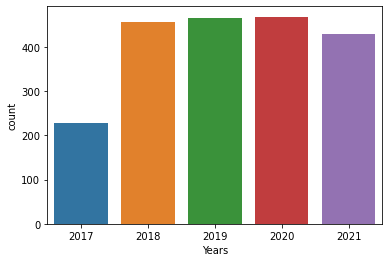

In [15]:
# count plot
sns.countplot(df['Years'],label='Count') # count plot
plt.show()

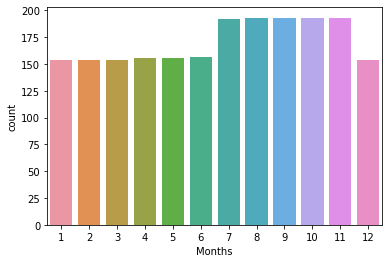

In [16]:
# count plot
sns.countplot(df['Months'],label='Count') # count plot
plt.show()

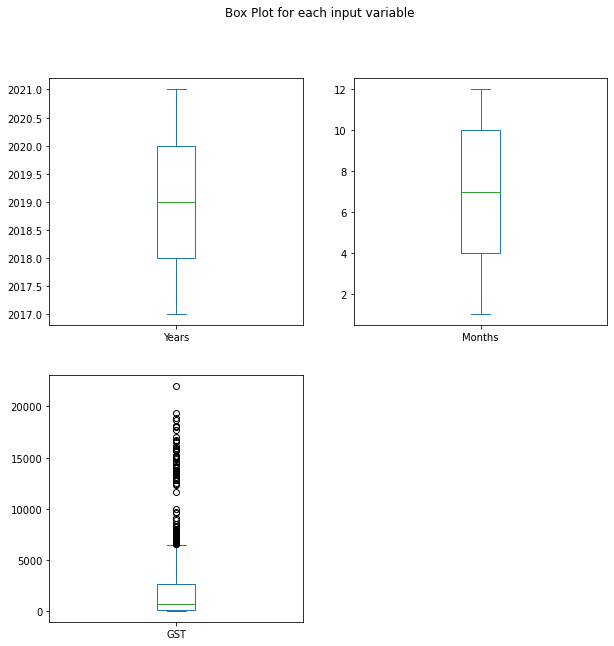

In [17]:
#box plot
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,10), title='Box Plot for each input variable')
# plt.savefig('GST_box')
plt.show()

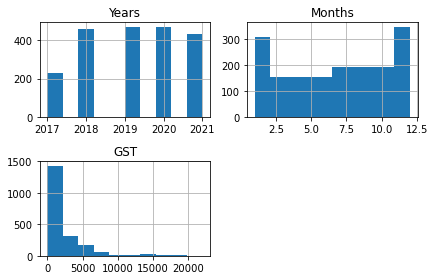

In [18]:
# histogram
df.hist()
plt.tight_layout()
# plt.savefig('gst_hist')  # to save graph image as png

#### Let's get the statistical analysis of our dataset by using decribe() of pandas module.

In [19]:
set_option('precision',2)
df.describe() # only number columns

,Years,Months,GST
count,2046.0,2046.00,2046.00
mean,2019.2,6.74,1920.12
std,1.3,3.39,2901.01
min,2017.0,1.00,0.00
25%,2018.0,4.00,91.42
50%,2019.0,7.00,688.15
75%,2020.0,10.00,2645.43
max,2021.0,12.00,22012.63


In [20]:
df.describe().T  # statictical data in tranverse form

,count,mean,std,min,25%,50%,75%,max
Years,2046.0,2019.20,1.30,2017.0,2018.00,2019.00,2020.00,2021.00
Months,2046.0,6.74,3.39,1.0,4.00,7.00,10.00,12.00
GST,2046.0,1920.12,2901.01,0.0,91.42,688.15,2645.43,22012.63


In [21]:
df.describe(include="all") # with entire columns

,Years,Months,States,GST
count,2046.0,2046.00,2046,2046.00
unique,NaN,NaN,39,NaN
top,NaN,NaN,Jammu and Kashmir,NaN
freq,NaN,NaN,53,NaN
mean,2019.2,6.74,NaN,1920.12
std,1.3,3.39,NaN,2901.01
min,2017.0,1.00,NaN,0.00
25%,2018.0,4.00,NaN,91.42
50%,2019.0,7.00,NaN,688.15
75%,2020.0,10.00,NaN,2645.43


## ** Univariate Analysis **

In [22]:
yr21 = df.loc[df["Years"]==2021]

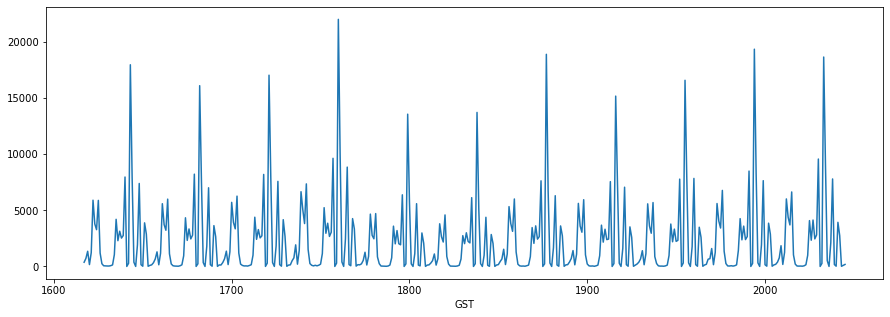

In [23]:
plt.plot(yr21["GST"])
plt.gcf().set_size_inches((15, 5))
plt.xlabel("GST")
plt.show()

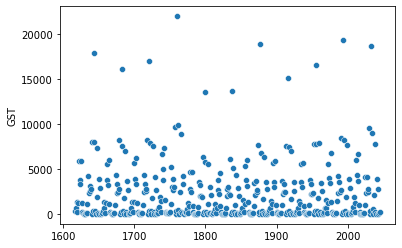

In [24]:
sns.scatterplot(data=yr21["GST"])
plt.show()

## ** Bivariate Analysis **

In [25]:
df.corr() # correlation

,Years,Months,GST
Years,1.00,-2.10e-01,6.14e-02
Months,-0.21,1.00e+00,-4.44e-03
GST,0.06,-4.44e-03,1.00e+00


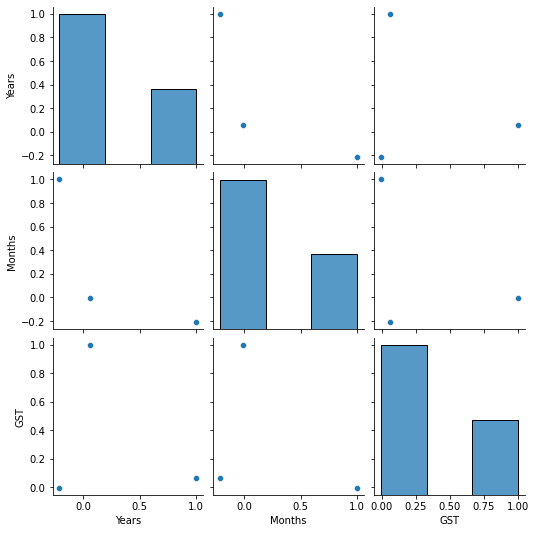

In [26]:
sns.pairplot(df.corr())
plt.show()

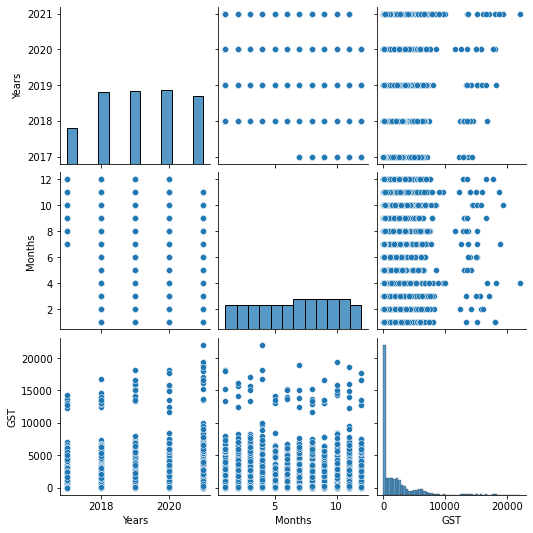

In [27]:
sns.pairplot(df)
plt.show()

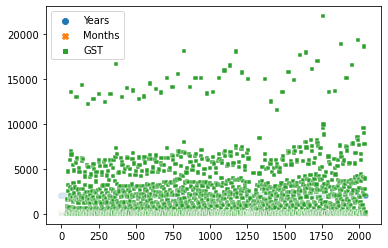

In [28]:
sns.scatterplot(data=df)
plt.show() # to show plot

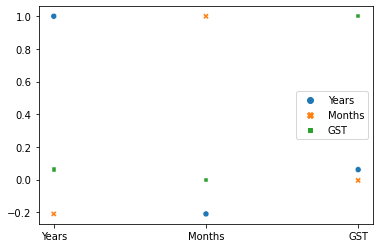

In [29]:
sns.scatterplot(data=df.corr())
plt.show() # to show plot

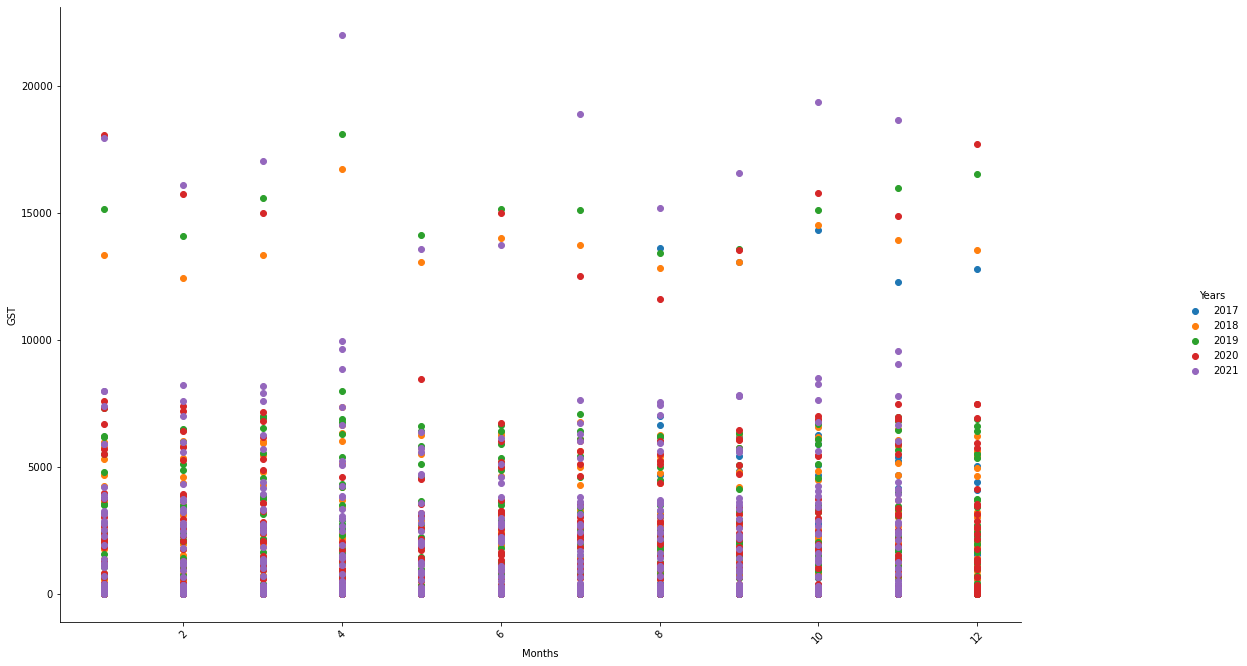

In [30]:
sns.FacetGrid(df, hue="Years", size=5).map(plt.scatter,"Months","GST").add_legend()
plt.gcf().set_size_inches((20, 10))
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

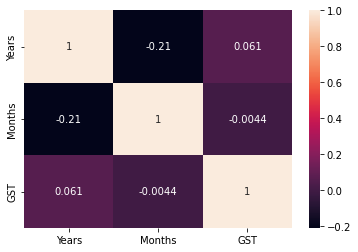

In [31]:
sns.heatmap(df.corr(), annot=True) # heatmap

## ** Multivariate Analysis **

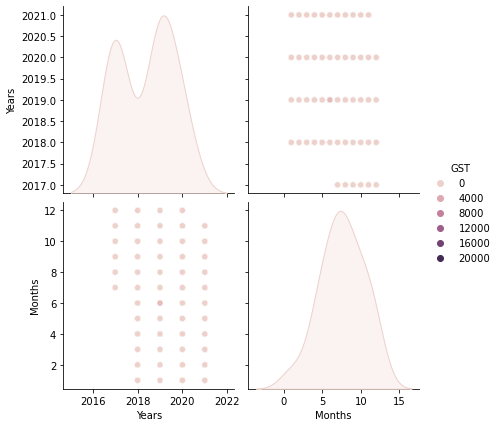

In [32]:
sns.pairplot(df, hue="GST", size=3)
plt.show()

In [33]:
df

,Years,Months,States,GST
0,2017,7,Jammu and Kashmir,1.26e-04
1,2017,7,Himachal Pradesh,1.75e-01
2,2017,7,Punjab,2.72e+00
3,2017,7,Chandigarh,3.74e-01
4,2017,7,Uttarakhand,1.85e-01
...,...,...,...,...
2041,2021,11,Telangana,3.93e+03
2042,2021,11,Andhra Pradesh,2.75e+03
2043,2021,11,Ladakh,1.34e+01
2044,2021,11,Other Territory,9.52e+01


### 1. The best performing states

In [45]:
df.groupby('States').mean()['GST'].sort_values(ascending=False).head(10)

States
Maharastra       14426.20
Karnataka         6528.07
Gujrat            6334.50
Tamil Nadu        5939.29
Uttar Pradesh     5110.53
Haryana           4712.31
West Bengal       3339.49
Delhi             3338.40
Telangana         3064.34
Rajasthan         2613.39
Name: GST, dtype: float64

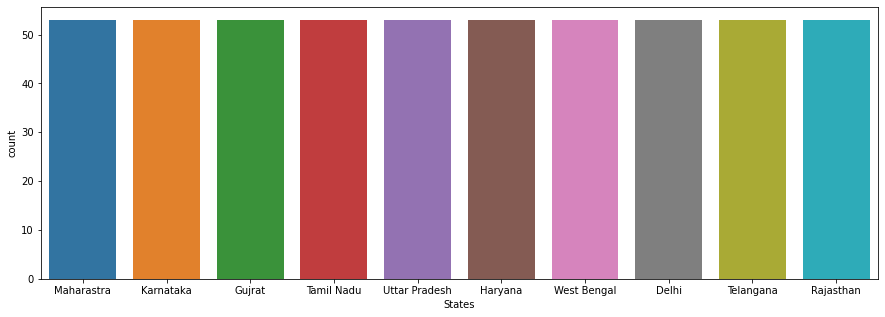

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='States', order=df.groupby('States').mean()['GST'].sort_values(ascending=False).head(10).index)
# plt.xticks(rotation=45)
plt.show()

### 2. The worst performing states

In [55]:
df.groupby('States').mean()['GST'].sort_values(ascending=True).head(10)

States
Lakshadweep                    1.36
Ladakh                         6.43
Mizoram                       19.49
Andaman and Nicobar Island    24.61
Nagaland                      24.66
Manipur                       30.54
Arunachal Pradesh             40.99
Tripura                       52.06
Daman and Diu                 65.87
CBIC                          86.44
Name: GST, dtype: float64

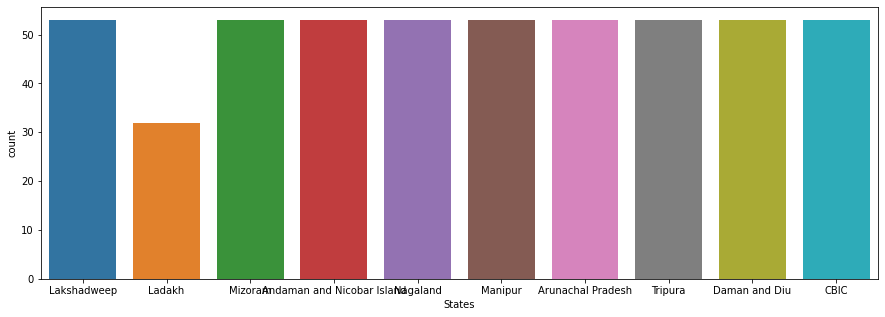

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='States', order=df.groupby('States').mean()['GST'].sort_values(ascending=True).head(10).index)
# plt.xticks(rotation=45)
plt.show()